# Parameters sensitivity

The sensitivity of 5 parameters of $node2vec$ and $word2vec$ were examined. 

All parameters beside of the learnt one are default.

In [1]:
# Import path to source directory (bit of a hack in Jupyter)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, os.path.join('..', 'src')))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
def write_to_file(res,param):
    now = datetime.now()
    current_time = now.strftime('%Y%m%d_one_eighth_'+param)
    filename = '../results/' + current_time + '.csv'
    res.to_csv(filename)

## Evaluation

In [4]:
#initialization
from objfun_node2vec import N2V
n2v = N2V('../data/clear_cluster_test/one_eighth.csv',
            '../data/clear_cluster_test/labels.csv')

In [5]:
n2v.evaluate(p=0.5, q=2, num_walks=10, len_walks=100, window=5)

0.8079999999999999

In [6]:
res = pd.DataFrame(columns=['walk_length','num_walks',
                            'p','q',
                            'window',
                            'adj_rand'])

for walk_length in range(20,120,10):
    for num_walks in [10]:
        for p in [1]:
            for q in [1]:
                for window in [10]:
                    adj_rand = n2v.evaluate(p,q,num_walks,walk_length,window)

                    res = res.append({'walk_length':walk_length,
                                      'num_walks':num_walks,
                                      'p':p,'q':q,
                                      'window':window,
                                      'adj_rand':adj_rand},ignore_index=True)
                            
write_to_file(res,'walk_length')

In [7]:
res = pd.DataFrame(columns=['walk_length','num_walks',
                            'p','q',
                            'window',
                            'adj_rand'])

for walk_length in [80]:
    for num_walks in range(6,24,2):
        for p in [1]:
            for q in [1]:
                for window in [10]:
                    adj_rand = n2v.evaluate(p,q,num_walks,walk_length,window)

                    res = res.append({'walk_length':walk_length,
                                      'num_walks':num_walks,
                                      'p':p,'q':q,
                                      'window':window,
                                      'adj_rand':adj_rand},ignore_index=True)
                            
write_to_file(res,'num_walks')

In [8]:
res = pd.DataFrame(columns=['walk_length','num_walks',
                            'p','q',
                            'window',
                            'adj_rand'])

for walk_length in [80]:
    for num_walks in [10]:
        for p in [0.25, 0.5, 1., 2., 4]:
            for q in [1.0]:
                for window in [10]:
                    adj_rand = n2v.evaluate(p,q,num_walks,walk_length,window)

                    res = res.append({'walk_length':walk_length,
                                      'num_walks':num_walks,
                                      'p':p,'q':q,
                                      'window':window,
                                      'adj_rand':adj_rand},ignore_index=True)
                            
write_to_file(res,'p')

In [9]:
res = pd.DataFrame(columns=['walk_length','num_walks',
                            'p','q',
                            'window',
                            'adj_rand'])

for walk_length in [80]:
    for num_walks in [10]:
        for p in [1.0]:
            for q in [0.25, 0.5, 1., 2., 4]:
                for window in [10]:
                    adj_rand = n2v.evaluate(p,q,num_walks,walk_length,window)

                    res = res.append({'walk_length':walk_length,
                                      'num_walks':num_walks,
                                      'p':p,'q':q,
                                      'window':window,
                                      'adj_rand':adj_rand},ignore_index=True)
                            
write_to_file(res,'q')

In [10]:
res = pd.DataFrame(columns=['walk_length','num_walks',
                            'p','q',
                            'window',
                            'adj_rand'])

for walk_length in [80]:
    for num_walks in [10]:
        for p in [1.0]:
            for q in [1.0]:
                for window in range(2,22,2):
                    adj_rand = n2v.evaluate(p,q,num_walks,walk_length,window)

                    res = res.append({'walk_length':walk_length,
                                      'num_walks':num_walks,
                                      'p':p,'q':q,
                                      'window':window,
                                      'adj_rand':adj_rand},ignore_index=True)
                            
write_to_file(res,'window')

## Visualization of the results

In [11]:
now = datetime.now()
current_time = now.strftime('%Y%m%d')

res_walk_length = pd.read_csv('../results/'+current_time+'_one_eighth_walk_length.csv')
res_num_walks = pd.read_csv('../results/'+current_time+'_one_eighth_num_walks.csv')
res_p = pd.read_csv('../results/'+current_time+'_one_eighth_p.csv')
res_q = pd.read_csv('../results/'+current_time+'_one_eighth_q.csv')
res_window = pd.read_csv('../results/'+current_time+'_one_eighth_window.csv')

In [12]:
x1 = res_walk_length['walk_length']
y1 = res_walk_length['adj_rand'].tolist()

x2 = res_num_walks['num_walks']
y2 = res_num_walks['adj_rand'].tolist()

x3 = res_window['window']
y3 = res_window['adj_rand'].tolist()

x4 = res_p['p']
y4 = res_p['adj_rand'].tolist()

x5 = res_q['q']
y5 = res_q['adj_rand'].tolist()

Text(0, 0.5, 'score')

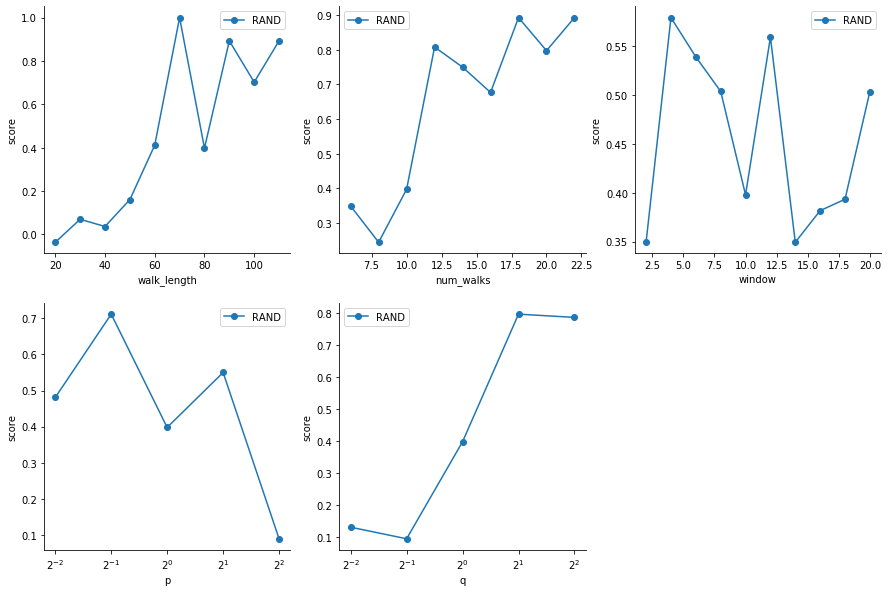

In [13]:
plt.figure(figsize=[15,10])

plt.subplot(231)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.plot(x1,y1,'o-',label='RAND')
plt.legend(loc='best', frameon=True)
plt.xlabel('walk_length')
plt.ylabel('score')

plt.subplot(232)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.plot(x2,y2,'o-',label='RAND')
plt.legend(loc='best', frameon=True)
plt.xlabel('num_walks')
plt.ylabel('score')

plt.subplot(233)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.plot(x3,y3,'o-',label='RAND')
plt.legend(loc='best', frameon=True)
plt.xlabel('window')
plt.ylabel('score')

plt.subplot(234)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.plot(x4,y4,'o-',label='RAND')
plt.xscale('log', basex=2)
plt.legend(loc='best', frameon=True)
plt.xlabel('p')
plt.ylabel('score')

plt.subplot(235)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.plot(x5,y5,'o-',label='RAND')
plt.xscale('log', basex=2)
plt.legend(loc='best', frameon=True)
plt.xlabel('q')
plt.ylabel('score')

## Conclusion

- The results are more fluctuate than expected, but some relations still can be seen. 